In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

# Setting to make numbers easier to read on display
pd.options.display.float_format = '{:20.2f}'.format

# Show all columns on output
pd.set_option('display.max_columns', 999)

## Data Exploration

In [3]:
df = pd.read_excel(r'C:\Users\Folio 1040 G3\Desktop\project\online+retail+ii\online_retail_II.xlsx', sheet_name=1)

df.head(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.00,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.00,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.00,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.00,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.00,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.00,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.00,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.00,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.00,United Kingdom
9,536368,22960,JAM MAKING SET WITH JARS,6,2010-12-01 08:34:00,4.25,13047.00,United Kingdom


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 536642 entries, 0 to 536641
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      536642 non-null  object        
 1   StockCode    536642 non-null  object        
 2   Description  535188 non-null  object        
 3   Quantity     536642 non-null  int64         
 4   InvoiceDate  536642 non-null  datetime64[ns]
 5   Price        536642 non-null  float64       
 6   Customer ID  401605 non-null  float64       
 7   Country      536642 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.8+ MB


In [5]:
df.describe()

,Quantity,Price,Customer ID
count,536642.00,536642.00,401605.00
mean,9.62,4.63,15281.15
std,219.13,97.23,1714.01
min,-80995.00,-11062.06,12346.00
25%,1.00,1.25,13939.00
50%,3.00,2.08,15145.00
75%,10.00,4.13,16784.00
max,80995.00,38970.00,18287.00


In [6]:
df.describe(include='O')

,Invoice,StockCode,Description,Country
count,536642,536642,535188,536642
unique,25900,4070,4223,38
top,573585,85123A,WHITE HANGING HEART T-LIGHT HOLDER,United Kingdom
freq,1114,2301,2357,490300


In [7]:
df[df["Customer ID"].isna()].head(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
605,536414,22139,NaN,56,2010-12-01 11:52:00,0.00,NaN,United Kingdom
1407,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1408,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1409,536544,21786,POLKADOT RAIN HAT,4,2010-12-01 14:32:00,0.85,NaN,United Kingdom
1410,536544,21787,RAIN PONCHO RETROSPOT,2,2010-12-01 14:32:00,1.66,NaN,United Kingdom
1411,536544,21790,VINTAGE SNAP CARDS,9,2010-12-01 14:32:00,1.66,NaN,United Kingdom
1412,536544,21791,VINTAGE HEADS AND TAILS CARD GAME,2,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1413,536544,21801,CHRISTMAS TREE DECORATION WITH BELL,10,2010-12-01 14:32:00,0.43,NaN,United Kingdom
1414,536544,21802,CHRISTMAS TREE HEART DECORATION,9,2010-12-01 14:32:00,0.43,NaN,United Kingdom
1415,536544,21803,CHRISTMAS TREE STAR DECORATION,11,2010-12-01 14:32:00,0.43,NaN,United Kingdom


In [8]:
df[df["Quantity"] < 0].head(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.00,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.00,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.00,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.00,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.00,United Kingdom
238,C536391,21980,PACK OF 12 RED RETROSPOT TISSUES,-24,2010-12-01 10:24:00,0.29,17548.00,United Kingdom
239,C536391,21484,CHICK GREY HOT WATER BOTTLE,-12,2010-12-01 10:24:00,3.45,17548.00,United Kingdom
240,C536391,22557,PLASTERS IN TIN VINTAGE PAISLEY,-12,2010-12-01 10:24:00,1.65,17548.00,United Kingdom
241,C536391,22553,PLASTERS IN TIN SKULLS,-24,2010-12-01 10:24:00,1.65,17548.00,United Kingdom
914,C536506,22960,JAM MAKING SET WITH JARS,-6,2010-12-01 12:38:00,4.25,17897.00,United Kingdom


In [9]:
df["Invoice"] = df["Invoice"].astype("str")
df[df["Invoice"].str.match("^\\d{6}$") == False]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.00,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.00,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.00,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.00,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.00,United Kingdom
...,...,...,...,...,...,...,...,...
535188,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.00,United Kingdom
536280,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.00,United Kingdom
536447,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.00,United Kingdom
536448,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.00,United Kingdom


In [10]:
df["Invoice"].str.replace("[0-9]", "", regex=True).unique()

array(['', 'C', 'A'], dtype=object)

In [11]:
df[df["Invoice"].str.startswith("A")]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
297645,A563185,B,Adjust bad debt,1,2011-08-12 14:50:00,11062.06,NaN,United Kingdom
297646,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,NaN,United Kingdom
297647,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,NaN,United Kingdom


In [12]:
df["StockCode"] = df["StockCode"].astype("str")
df[(df["StockCode"].str.match("^\\d{5}$") == False) & (df["StockCode"].str.match("^\\d{5}[a-zA-Z]+$") == False)]["StockCode"].unique()

array(['POST', 'D', 'C2', 'DOT', 'M', 'BANK CHARGES', 'S', 'AMAZONFEE',
       'DCGS0076', 'DCGS0003', 'gift_0001_40', 'DCGS0070', 'm',
       'gift_0001_50', 'gift_0001_30', 'gift_0001_20', 'DCGS0055',
       'DCGS0072', 'DCGS0074', 'DCGS0069', 'DCGS0057', 'DCGSSBOY',
       'DCGSSGIRL', 'gift_0001_10', 'PADS', 'DCGS0004', 'DCGS0073',
       'DCGS0071', 'DCGS0066P', 'DCGS0068', 'DCGS0067', 'B', 'CRUK'],
      dtype=object)

### Notes

#### Stock Code
* StockCode is meant to follow the pattern `[0-9]{5}` but seems to have legit values for `[0-9]{5}[a-zA-Z]+`
    * Also contains other values:
        | **Code**            | **Description**                                                        | **Action**              |
        |---------------------|------------------------------------------------------------------------|-------------------------|
        | DCGS            | Looks valid, some quantities are negative though and customer ID is null | Exclude from clustering |
        | D               | Looks valid, represents discount values                                | Exclude from clustering |
        | DOT             | Looks valid, represents postage charges                                | Exclude from clustering |
        | M or m          | Looks valid, represents manual transactions                            | Exclude from clustering |
        | C2              | Carriage transaction - not sure what this means                        | Exclude from clustering |
        | BANK CHARGES or B | Bank charges                                                        | Exclude from clustering |
        | S               | Samples sent to customer                                               | Exclude from clustering |
        | gift__XXX       | Purchases with gift cards, might be interesting for another analysis, but no customer data | Exclude |
        | PADS            | Looks like a legit stock code for padding                              | Include                 |
        | AMAZONFEE       | Looks like fees for Amazon shipping or something                       | Exclude for now         |
        | CRUX            | Commissions                                                            | Exclude for now         |

## Data Cleaning

In [17]:
cleaned_df = df.copy()

In [18]:
cleaned_df["Invoice"] = cleaned_df["Invoice"].astype("str")

mask = (
    cleaned_df["Invoice"].str.match("^\\d{6}$") == True
)

cleaned_df = cleaned_df[mask]

cleaned_df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.00,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.00,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.00,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.00,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.00,United Kingdom
...,...,...,...,...,...,...,...,...
536637,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.00,France
536638,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.00,France
536639,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.00,France
536640,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.00,France


In [20]:
cleaned_df["StockCode"] = cleaned_df["StockCode"].astype("str")

mask = (
    (cleaned_df["StockCode"].str.match("^\\d{5}$") == True)
    | (cleaned_df["StockCode"].str.match("^\\d{5}[a-zA-Z]+$") == True)
    | (cleaned_df["StockCode"].str.match("^PADS$") == True)
)

cleaned_df = cleaned_df[mask]

cleaned_df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.00,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.00,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.00,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.00,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.00,United Kingdom
...,...,...,...,...,...,...,...,...
536636,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.00,France
536637,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.00,France
536638,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.00,France
536639,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.00,France


In [25]:
cleaned_df.dropna(subset=["Customer ID"], inplace=True)

C:\Users\Folio 1040 G3\AppData\Local\Temp\ipykernel_3304\1633333693.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df.dropna(subset=["Customer ID"], inplace=True)


In [26]:
cleaned_df.describe()

,Quantity,Price,Customer ID
count,391187.00,391187.00,391187.00
mean,13.18,2.87,15295.09
std,181.91,4.28,1710.35
min,1.00,0.00,12346.00
25%,2.00,1.25,13969.00
50%,6.00,1.95,15158.00
75%,12.00,3.75,16794.00
max,80995.00,649.50,18287.00


need to drop transactions with price = 0

In [27]:
len(cleaned_df[cleaned_df["Price"] == 0])

34

In [28]:
cleaned_df = cleaned_df[cleaned_df["Price"] > 0.0]

In [29]:
cleaned_df.describe()

,Quantity,Price,Customer ID
count,391153.00,391153.00,391153.00
mean,13.15,2.87,15295.17
std,180.81,4.28,1710.33
min,1.00,0.00,12346.00
25%,2.00,1.25,13969.00
50%,6.00,1.95,15159.00
75%,12.00,3.75,16794.00
max,80995.00,649.50,18287.00


min price still shows 0.00 

In [31]:
cleaned_df["Price"].min()

0.001

In [34]:
(len(df)-len(cleaned_df))/len(df)

0.27110997648339114

27.1% data has been cleaned from the original dataset during cleaning

## Feature Engineering

In [35]:
cleaned_df["SalesLineTotal"] = cleaned_df["Quantity"] * cleaned_df["Price"]

cleaned_df

C:\Users\Folio 1040 G3\AppData\Local\Temp\ipykernel_3304\2846558921.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df["SalesLineTotal"] = cleaned_df["Quantity"] * cleaned_df["Price"]


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,SalesLineTotal
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.00,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.00,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.00,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.00,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.00,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
536636,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.00,France,10.20
536637,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.00,France,12.60
536638,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.00,France,16.60
536639,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.00,France,16.60


In [36]:
aggregated_df = cleaned_df.groupby(by="Customer ID", as_index=False) \
    .agg(
        MonetaryValue=("SalesLineTotal", "sum"),
        Frequency=("Invoice", "nunique"),
        LastInvoiceDate=("InvoiceDate", "max")
    )

aggregated_df.head(5)

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate
0,12346.00,77183.60,1,2011-01-18 10:01:00
1,12347.00,4310.00,7,2011-12-07 15:52:00
2,12348.00,1437.24,4,2011-09-25 13:13:00
3,12349.00,1457.55,1,2011-11-21 09:51:00
4,12350.00,294.40,1,2011-02-02 16:01:00


since dataset is for 2010-2011, most recent date from dataset was used as current date to calculate Recency

In [37]:
max_invoice_date = aggregated_df["LastInvoiceDate"].max()

aggregated_df["Recency"] = (max_invoice_date - aggregated_df["LastInvoiceDate"]).dt.days

aggregated_df.head(5)

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency
0,12346.00,77183.60,1,2011-01-18 10:01:00,325
1,12347.00,4310.00,7,2011-12-07 15:52:00,1
2,12348.00,1437.24,4,2011-09-25 13:13:00,74
3,12349.00,1457.55,1,2011-11-21 09:51:00,18
4,12350.00,294.40,1,2011-02-02 16:01:00,309


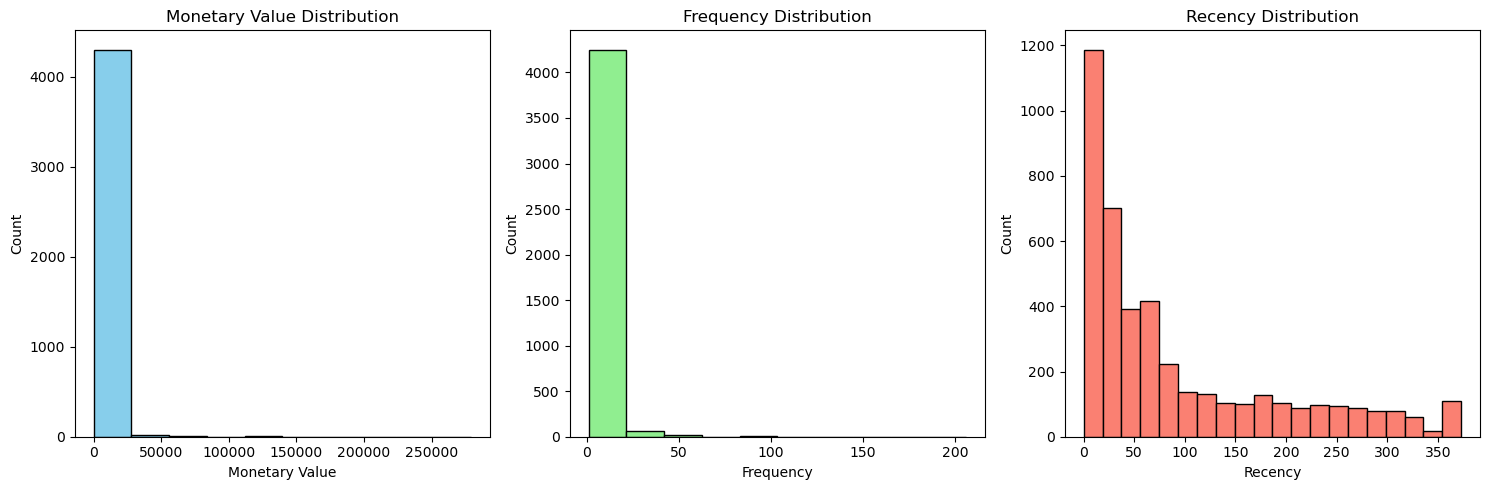

In [38]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.hist(aggregated_df['MonetaryValue'], bins=10, color='skyblue', edgecolor='black')
plt.title('Monetary Value Distribution')
plt.xlabel('Monetary Value')
plt.ylabel('Count')

plt.subplot(1, 3, 2)
plt.hist(aggregated_df['Frequency'], bins=10, color='lightgreen', edgecolor='black')
plt.title('Frequency Distribution')
plt.xlabel('Frequency')
plt.ylabel('Count')

plt.subplot(1, 3, 3)
plt.hist(aggregated_df['Recency'], bins=20, color='salmon', edgecolor='black')
plt.title('Recency Distribution')
plt.xlabel('Recency')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

Monetary value and frequency have outliers and recency has a poisson distribution

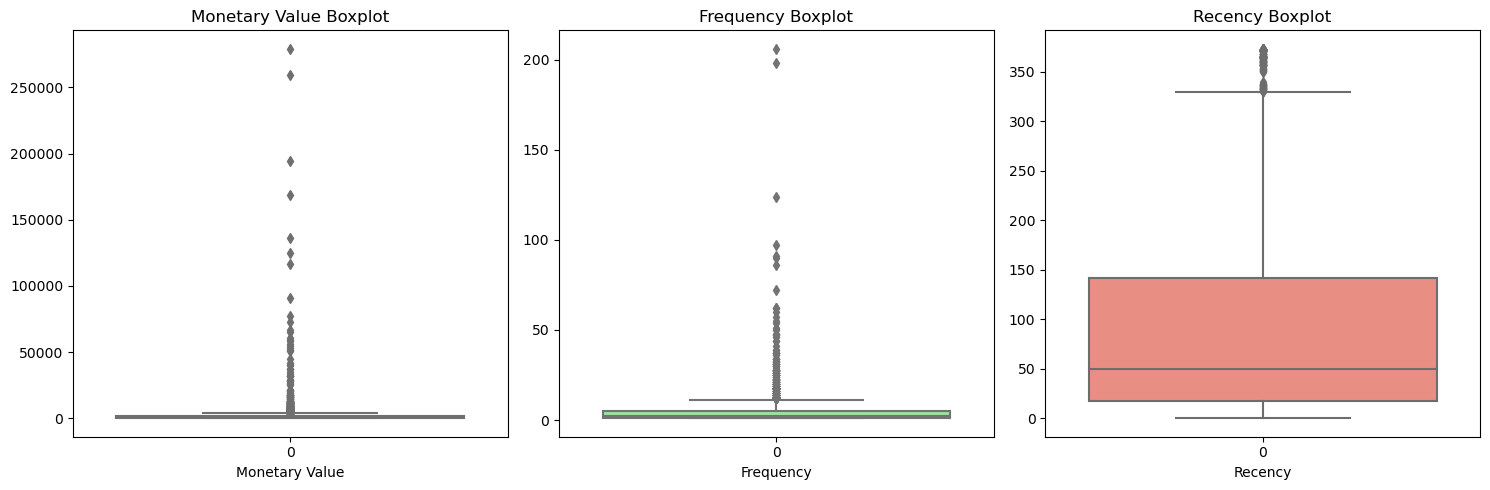

In [40]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.boxplot(data=aggregated_df['MonetaryValue'], color='skyblue')
plt.title('Monetary Value Boxplot')
plt.xlabel('Monetary Value')

plt.subplot(1, 3, 2)
sns.boxplot(data=aggregated_df['Frequency'], color='lightgreen')
plt.title('Frequency Boxplot')
plt.xlabel('Frequency')

plt.subplot(1, 3, 3)
sns.boxplot(data=aggregated_df['Recency'], color='salmon')
plt.title('Recency Boxplot')
plt.xlabel('Recency')

plt.tight_layout()
plt.show()

In [41]:
M_Q1 = aggregated_df["MonetaryValue"].quantile(0.25)
M_Q3 = aggregated_df["MonetaryValue"].quantile(0.75)
M_IQR = M_Q3 - M_Q1

monetary_outliers_df = aggregated_df[(aggregated_df["MonetaryValue"] > (M_Q3 + 1.5 * M_IQR)) | (aggregated_df["MonetaryValue"] < (M_Q1 - 1.5 * M_IQR))].copy()

monetary_outliers_df.describe()

,Customer ID,MonetaryValue,Frequency,Recency
count,421.00,421.00,421.00,421.00
mean,15020.89,12634.95,16.71,24.80
std,1791.69,26200.27,19.14,47.27
min,12346.00,3627.77,1.00,0.00
25%,13324.00,4395.65,8.00,3.00
50%,14961.00,5870.08,12.00,10.00
75%,16626.00,9585.91,19.00,23.00
max,18251.00,279138.02,206.00,371.00


In [42]:
F_Q1 = aggregated_df['Frequency'].quantile(0.25)
F_Q3 = aggregated_df['Frequency'].quantile(0.75)
F_IQR = F_Q3 - F_Q1

frequency_outliers_df = aggregated_df[(aggregated_df['Frequency'] > (F_Q3 + 1.5 * F_IQR)) | (aggregated_df['Frequency'] < (F_Q1 - 1.5 * F_IQR))].copy()

frequency_outliers_df.describe()

,Customer ID,MonetaryValue,Frequency,Recency
count,278.00,278.00,278.00,278.00
mean,15355.67,14467.37,23.09,13.17
std,1745.00,30133.64,21.17,30.37
min,12395.00,1296.44,12.00,0.00
25%,13880.25,4197.77,13.00,2.00
50%,15290.50,6267.41,17.00,5.50
75%,16781.25,11023.89,25.00,15.00
max,18283.00,279138.02,206.00,371.00


In [43]:
non_outliers_df = aggregated_df[(~aggregated_df.index.isin(monetary_outliers_df.index)) & (~aggregated_df.index.isin(frequency_outliers_df.index))]

non_outliers_df.describe()

,Customer ID,MonetaryValue,Frequency,Recency
count,3866.00,3866.00,3866.00,3866.00
mean,15324.36,851.93,2.76,99.88
std,1710.15,795.37,2.17,101.85
min,12348.00,3.75,1.00,0.00
25%,13850.25,276.61,1.00,21.00
50%,15333.50,565.92,2.00,58.00
75%,16799.00,1178.29,4.00,159.75
max,18287.00,3619.17,11.00,373.00


In [46]:
print(non_outliers_df.columns)


Index(['Customer ID', 'MonetaryValue', 'Frequency', 'LastInvoiceDate',
       'Recency'],
      dtype='object')


In [52]:
non_outliers_df.reset_index(drop=True, inplace=True)


In [53]:
non_outliers_df.columns = non_outliers_df.columns.str.strip()


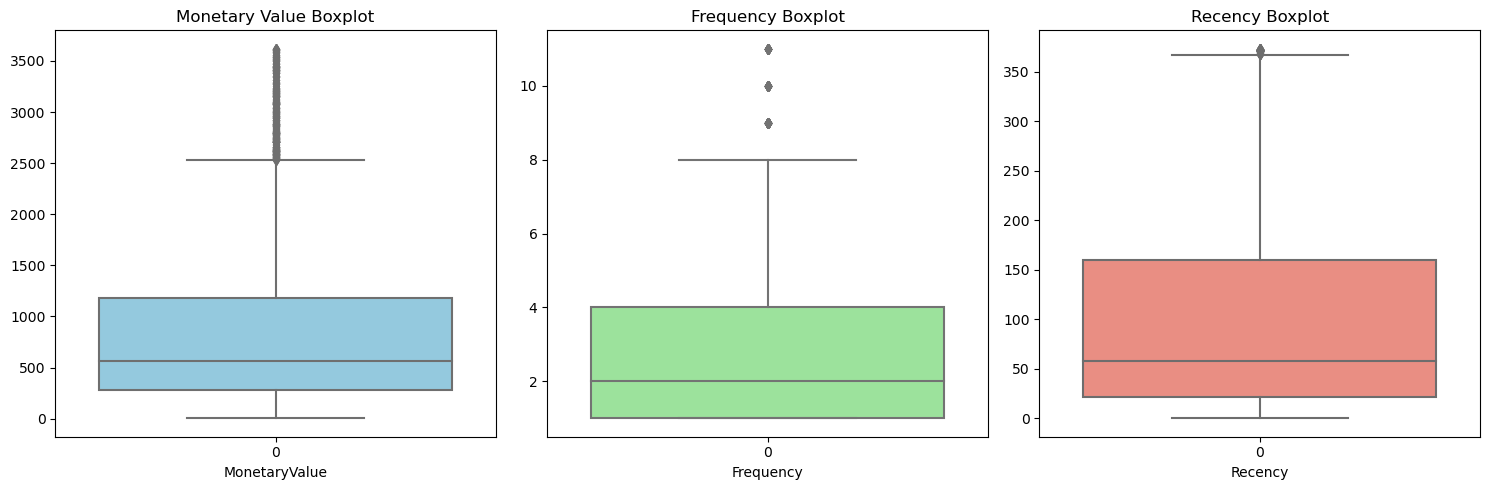

In [54]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.boxplot(data=non_outliers_df['MonetaryValue'], color='skyblue')
plt.title('Monetary Value Boxplot')
plt.xlabel('MonetaryValue')

plt.subplot(1, 3, 2)
sns.boxplot(data=non_outliers_df['Frequency'], color='lightgreen')
plt.title('Frequency Boxplot')
plt.xlabel('Frequency')

plt.subplot(1, 3, 3)
sns.boxplot(data=non_outliers_df['Recency'], color='salmon')
plt.title('Recency Boxplot')
plt.xlabel('Recency')

plt.tight_layout()
plt.show()

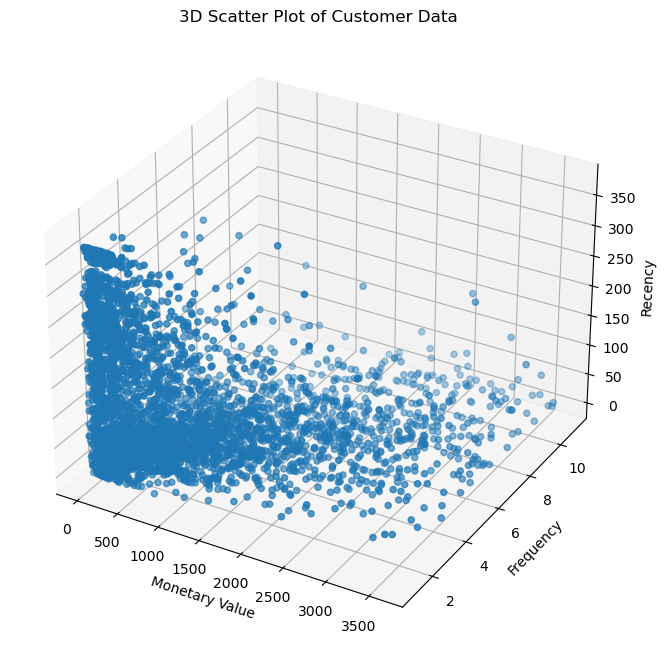

In [55]:
fig = plt.figure(figsize=(8, 8))

ax = fig.add_subplot(projection="3d")

scatter = ax.scatter(non_outliers_df["MonetaryValue"], non_outliers_df["Frequency"], non_outliers_df["Recency"])

ax.set_xlabel('Monetary Value')
ax.set_ylabel('Frequency')
ax.set_zlabel('Recency')

ax.set_title('3D Scatter Plot of Customer Data')

plt.show()

Standard scaling transforms the features of your data to have a mean of 0 and a standard deviation of 1, ensuring that each feature contributes equally to the analysis.

$$
z = \frac{x - \mu}{\sigma}
$$

Where:
- $z$ is the standardized value,
- $x$ is the original value,
- $\mu$ is the mean of the feature,
- $\sigma$ is the standard deviation of the feature.

In [56]:
scaler = StandardScaler()

scaled_data = scaler.fit_transform(non_outliers_df[["MonetaryValue", "Frequency", "Recency"]])

scaled_data

array([[ 0.73600195,  0.57119213, -0.25414941],
       [ 0.76154068, -0.80952615, -0.80403728],
       [-0.70105761, -0.80952615,  2.05341576],
       ...,
       [-0.96962293, -0.80952615,  0.78670977],
       [-0.84736145, -0.34928672, -0.91205096],
       [ 1.23903064,  0.1109527 , -0.56837105]])

In [57]:
scaled_data_df = pd.DataFrame(scaled_data, index=non_outliers_df.index, columns=("MonetaryValue", "Frequency", "Recency"))

scaled_data_df

,MonetaryValue,Frequency,Recency
0,0.74,0.57,-0.25
1,0.76,-0.81,-0.80
2,-0.70,-0.81,2.05
3,0.67,1.95,-0.64
4,-0.96,-0.81,1.01
...,...,...,...
3861,-0.85,-0.81,-0.26
3862,-0.84,-0.81,1.74
3863,-0.97,-0.81,0.79
3864,-0.85,-0.35,-0.91


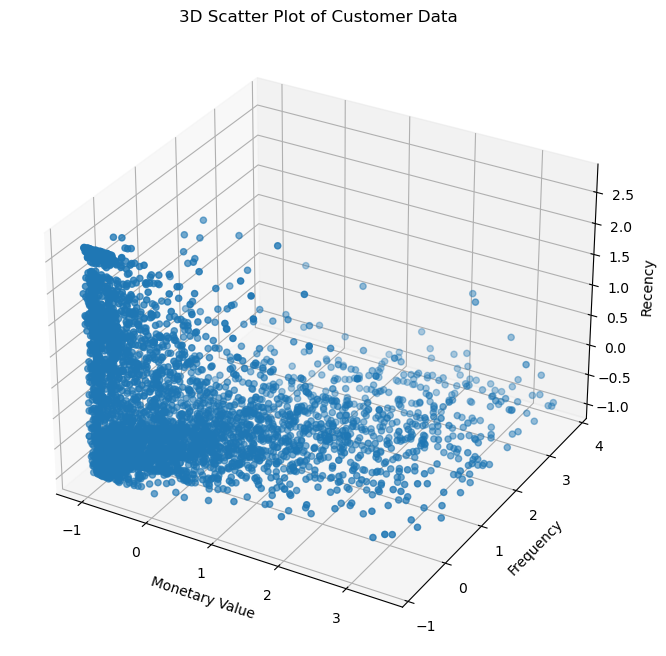

In [58]:
fig = plt.figure(figsize=(8, 8))

ax = fig.add_subplot(projection="3d")

scatter = ax.scatter(scaled_data_df["MonetaryValue"], scaled_data_df["Frequency"], scaled_data_df["Recency"])

ax.set_xlabel('Monetary Value')
ax.set_ylabel('Frequency')
ax.set_zlabel('Recency')

ax.set_title('3D Scatter Plot of Customer Data')

plt.show()

## KMeans Clustering

### Elbow Method 

The Elbow Method is a heuristic used to determine the optimal number of clusters ($K$) in a K-Means clustering algorithm. The method involves running the K-Means algorithm on the dataset for a range of values of $K$ (e.g., $K=1$ to $K=10$) and calculating the within-cluster sum of squares (WCSS) for each $K$:


$$
WCSS = \sum_{i=1}^{K} \sum_{x \in C_i} || x - \mu_i ||^2
$$

Where:
- $K$ is the number of clusters,
- $C_i$ is the set of points assigned to cluster $i$,
- $\mu_i$ is the centroid of cluster $i$,
- $x$ represents each data point in cluster $C_i$.

As $K$ increases, the WCSS tends to decrease because clusters become smaller and tighter. The Elbow Method identifies the value of $K$ where the reduction in WCSS starts to diminish, forming an "elbow" shape in the plot of WCSS vs. $K$. The point where the elbow occurs is considered the optimal number of clusters, as adding more clusters beyond this point provides little improvement in explaining the variance.

### Silhouette Score

$$
s(i) = \frac{b(i) - a(i)}{\max(a(i), b(i))}
$$

Where:
- $s(i)$ is the silhouette score for a single sample $i$
- $a(i)$ is the average distance between $i$ and all other points in the same cluster,
- $b(i)$ is the minimum average distance between $i$ and all points in the nearest cluster to which $i$ does not belong.

The silhoutte score ranges between $[-1, 1]$, a higher value indicates more distinct clusters.

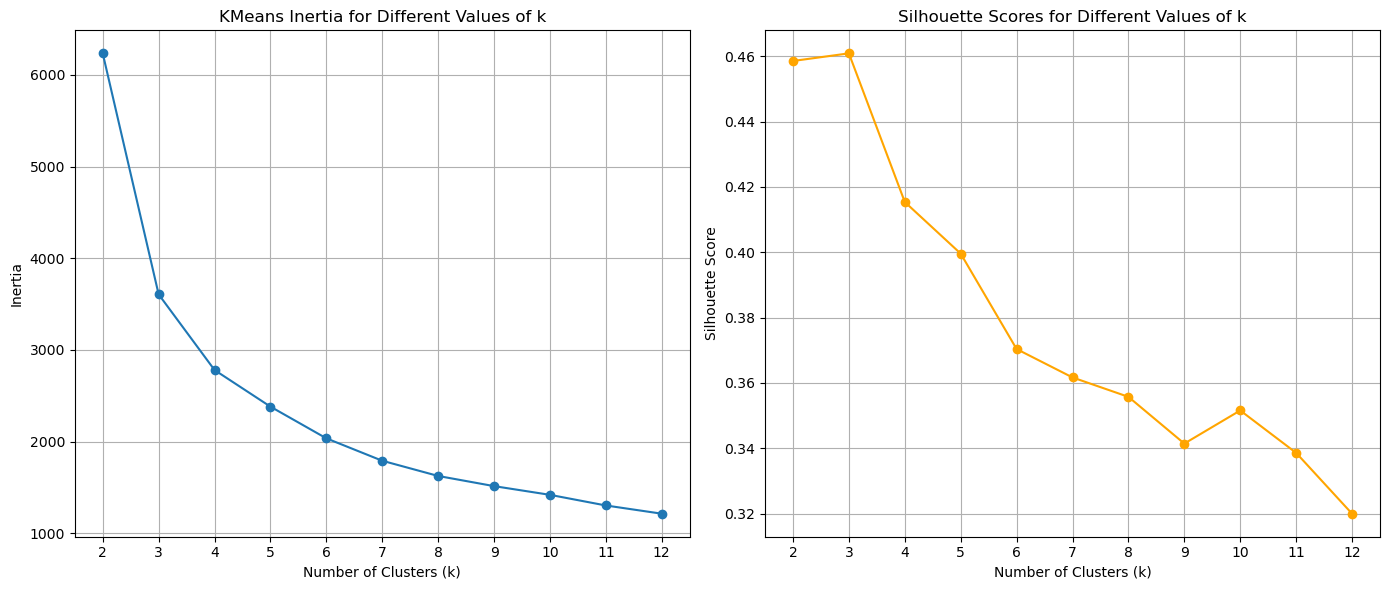

In [59]:
max_k = 12

inertia = []
silhoutte_scores = []
k_values = range(2, max_k + 1)

for k in k_values:

    kmeans = KMeans(n_clusters=k, random_state=42, max_iter=1000)

    cluster_labels = kmeans.fit_predict(scaled_data_df)

    sil_score = silhouette_score(scaled_data_df, cluster_labels)

    silhoutte_scores.append(sil_score)

    inertia.append(kmeans.inertia_)

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(k_values, inertia, marker='o')
plt.title('KMeans Inertia for Different Values of k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_values)
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(k_values, silhoutte_scores, marker='o', color='orange')
plt.title('Silhouette Scores for Different Values of k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.xticks(k_values)
plt.grid(True)

plt.tight_layout()
plt.show()

elbow point is around 4 and 5, so silhouette score is used to get the best value. 4 clusters will be used since it has a better silhouette score

In [64]:
kmeans = KMeans(n_clusters=4, random_state=42, max_iter=1000)

cluster_labels = kmeans.fit_predict(scaled_data_df)

cluster_labels

array([0, 1, 3, ..., 3, 1, 0])

In [65]:
non_outliers_df["Cluster"] = cluster_labels

non_outliers_df

C:\Users\Folio 1040 G3\AppData\Local\Temp\ipykernel_3304\3577770544.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_outliers_df["Cluster"] = cluster_labels


,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency,Cluster
0,12348.00,1437.24,4,2011-09-25 13:13:00,74,0
1,12349.00,1457.55,1,2011-11-21 09:51:00,18,1
2,12350.00,294.40,1,2011-02-02 16:01:00,309,3
3,12352.00,1385.74,7,2011-11-03 14:37:00,35,2
4,12353.00,89.00,1,2011-05-19 17:47:00,203,3
...,...,...,...,...,...,...
3861,18278.00,173.90,1,2011-09-27 11:58:00,73,1
3862,18280.00,180.60,1,2011-03-07 09:52:00,277,3
3863,18281.00,80.82,1,2011-06-12 10:53:00,180,3
3864,18282.00,178.05,2,2011-12-02 11:43:00,7,1


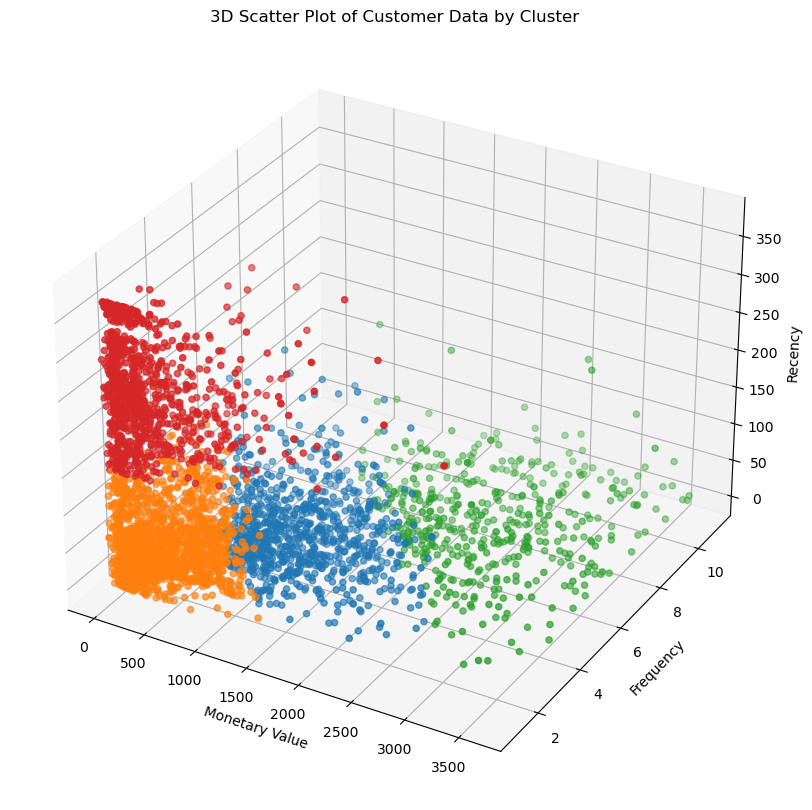

In [66]:
cluster_colors = {0: '#1f77b4',  # Blue
                  1: '#ff7f0e',  # Orange
                  2: '#2ca02c',  # Green
                  3: '#d62728'}  # Red

colors = non_outliers_df['Cluster'].map(cluster_colors)

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='3d')

scatter = ax.scatter(non_outliers_df['MonetaryValue'], 
                     non_outliers_df['Frequency'], 
                     non_outliers_df['Recency'], 
                     c=colors,  # Use mapped solid colors
                     marker='o')

ax.set_xlabel('Monetary Value')
ax.set_ylabel('Frequency')
ax.set_zlabel('Recency')

ax.set_title('3D Scatter Plot of Customer Data by Cluster')

plt.show()

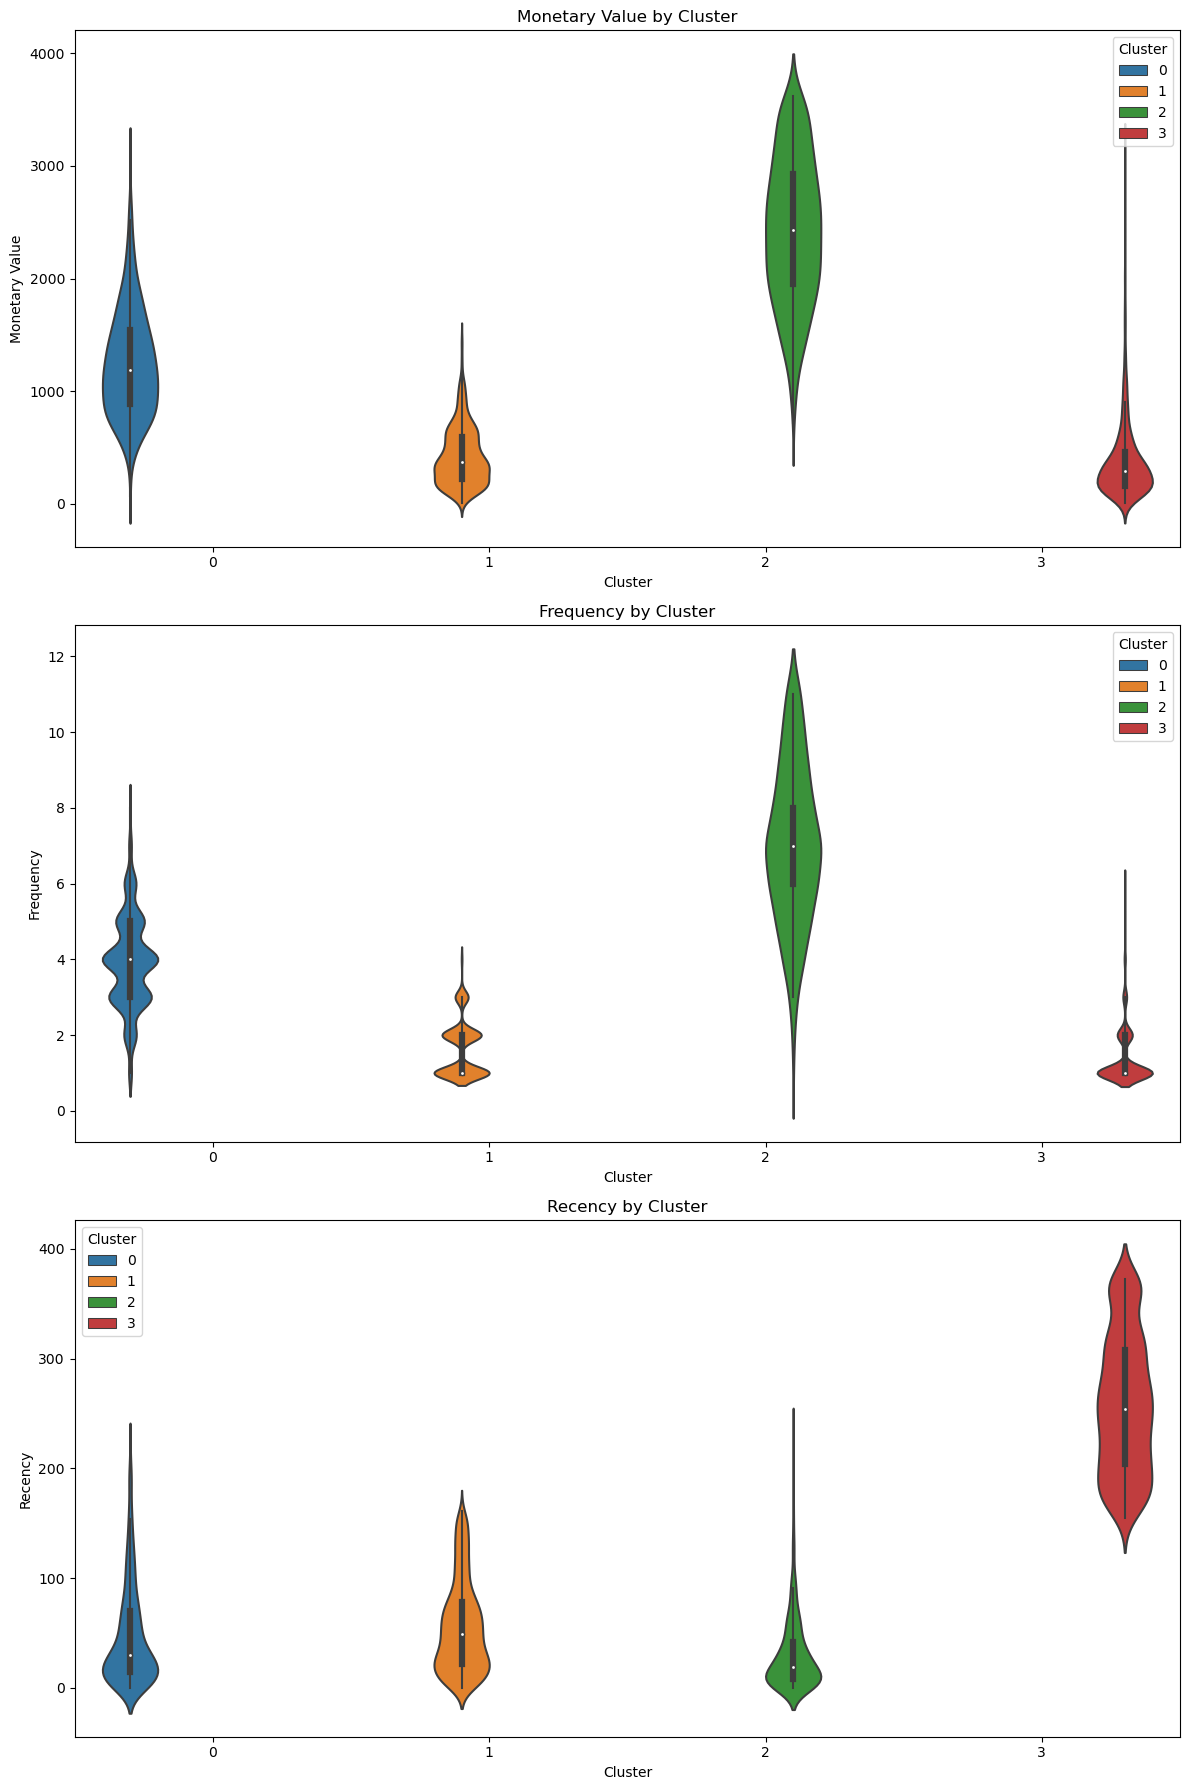

In [72]:
plt.figure(figsize=(12, 18))

plt.subplot(3, 1, 1)
sns.violinplot(x=non_outliers_df['Cluster'], y=non_outliers_df['MonetaryValue'], palette=cluster_colors, hue=non_outliers_df["Cluster"])
plt.title('Monetary Value by Cluster')
plt.ylabel('Monetary Value')

plt.subplot(3, 1, 2)
sns.violinplot(x=non_outliers_df['Cluster'], y=non_outliers_df['Frequency'], palette=cluster_colors, hue=non_outliers_df["Cluster"])
plt.title('Frequency by Cluster')
plt.ylabel('Frequency')

plt.subplot(3, 1, 3)
sns.violinplot(x=non_outliers_df['Cluster'], y=non_outliers_df['Recency'], palette=cluster_colors, hue=non_outliers_df["Cluster"])
plt.title('Recency by Cluster')
plt.ylabel('Recency')

plt.tight_layout()
plt.show()


### Cluster 0: Loyalists (Blue)
Rationale: This group consists of high-value customers who make regular purchases, though their buying activity hasn’t been very recent.
* Strategy 1: Implement a loyalty program that rewards consistent purchases over time, like points accumulation for future discounts.
* Strategy 2: Create personalized offers based on past purchase behavior to encourage re-engagement.
* Strategy 3: Offer early access to new products or exclusive sales to increase engagement.

### Cluster 1: Prospects (Orange)
Rationale: This segment is made up of lower-value, occasional buyers who have recently made a purchase.
* Strategy 1: Run targeted promotions to incentivize another purchase, like time-limited discounts or free shipping.
* Strategy 2: Use retargeting ads to stay top-of-mind and remind them of their previous interest.
* Strategy 3: Send personalized follow-up emails with recommended products based on their last purchase.

### Cluster 2: VIPs (Green)
Rationale: This cluster features highly frequent, high-value customers who have made recent purchases.
* Strategy 1: Offer exclusive, premium experiences such as early-bird access or curated recommendations.
* Strategy 2: Introduce a referral program to leverage their high satisfaction and spread positive word-of-mouth.
* Strategy 3: Use premium-tier perks like VIP customer service or invites to brand events to further nurture their loyalty.

### Cluster 3: Dormants (Red)
Rationale: This group includes low-value, infrequent buyers, many of whom are currently inactive.
* Strategy 1: Re-engage with win-back campaigns using deep discounts or compelling offers to entice them back.
* Strategy 2: Survey to understand why they’ve stopped purchasing and adjust messaging or product offerings accordingly.
* Strategy 3: Offer limited-time incentives tied to reminders about their last purchase or favorite product.

In [73]:
overlap_indices = monetary_outliers_df.index.intersection(frequency_outliers_df.index)

monetary_only_outliers = monetary_outliers_df.drop(overlap_indices)
frequency_only_outliers = frequency_outliers_df.drop(overlap_indices)
monetary_and_frequency_outliers = monetary_outliers_df.loc[overlap_indices]

monetary_only_outliers["Cluster"] = -1
frequency_only_outliers["Cluster"] = -2
monetary_and_frequency_outliers["Cluster"] = -3

outlier_clusters_df = pd.concat([monetary_only_outliers, frequency_only_outliers, monetary_and_frequency_outliers])

outlier_clusters_df

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency,Cluster
0,12346.00,77183.60,1,2011-01-18 10:01:00,325,-1
1,12347.00,4310.00,7,2011-12-07 15:52:00,1,-1
10,12357.00,6207.67,1,2011-11-06 16:07:00,32,-1
12,12359.00,6310.03,4,2011-10-13 12:47:00,57,-1
15,12362.00,4737.23,10,2011-12-06 15:40:00,2,-1
...,...,...,...,...,...,...
4248,18172.00,7561.68,20,2011-11-25 11:12:00,14,-3
4268,18198.00,5425.56,17,2011-12-05 14:49:00,3,-3
4287,18223.00,6484.54,14,2011-12-05 09:11:00,4,-3
4289,18225.00,5504.96,12,2011-12-06 13:27:00,2,-3


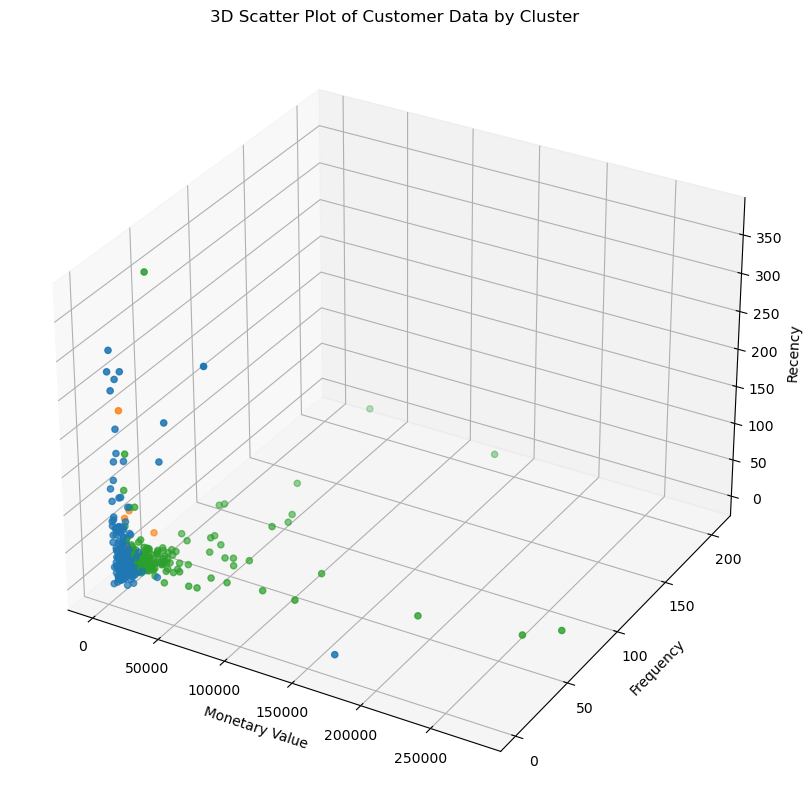

In [85]:
cluster_colors = {-1: '#1f77b4',  # Blue
                  -2: '#ff7f0e',  # Orange
                  -3: '#2ca02c'}  # Green

colors = outlier_clusters_df['Cluster'].map(cluster_colors)

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='3d')

scatter = ax.scatter(outlier_clusters_df['MonetaryValue'], 
                     outlier_clusters_df['Frequency'], 
                     outlier_clusters_df['Recency'], 
                     c=colors,  # Use mapped solid colors
                     marker='o')

ax.set_xlabel('Monetary Value')
ax.set_ylabel('Frequency')
ax.set_zlabel('Recency')

ax.set_title('3D Scatter Plot of Customer Data by Cluster')

plt.show()

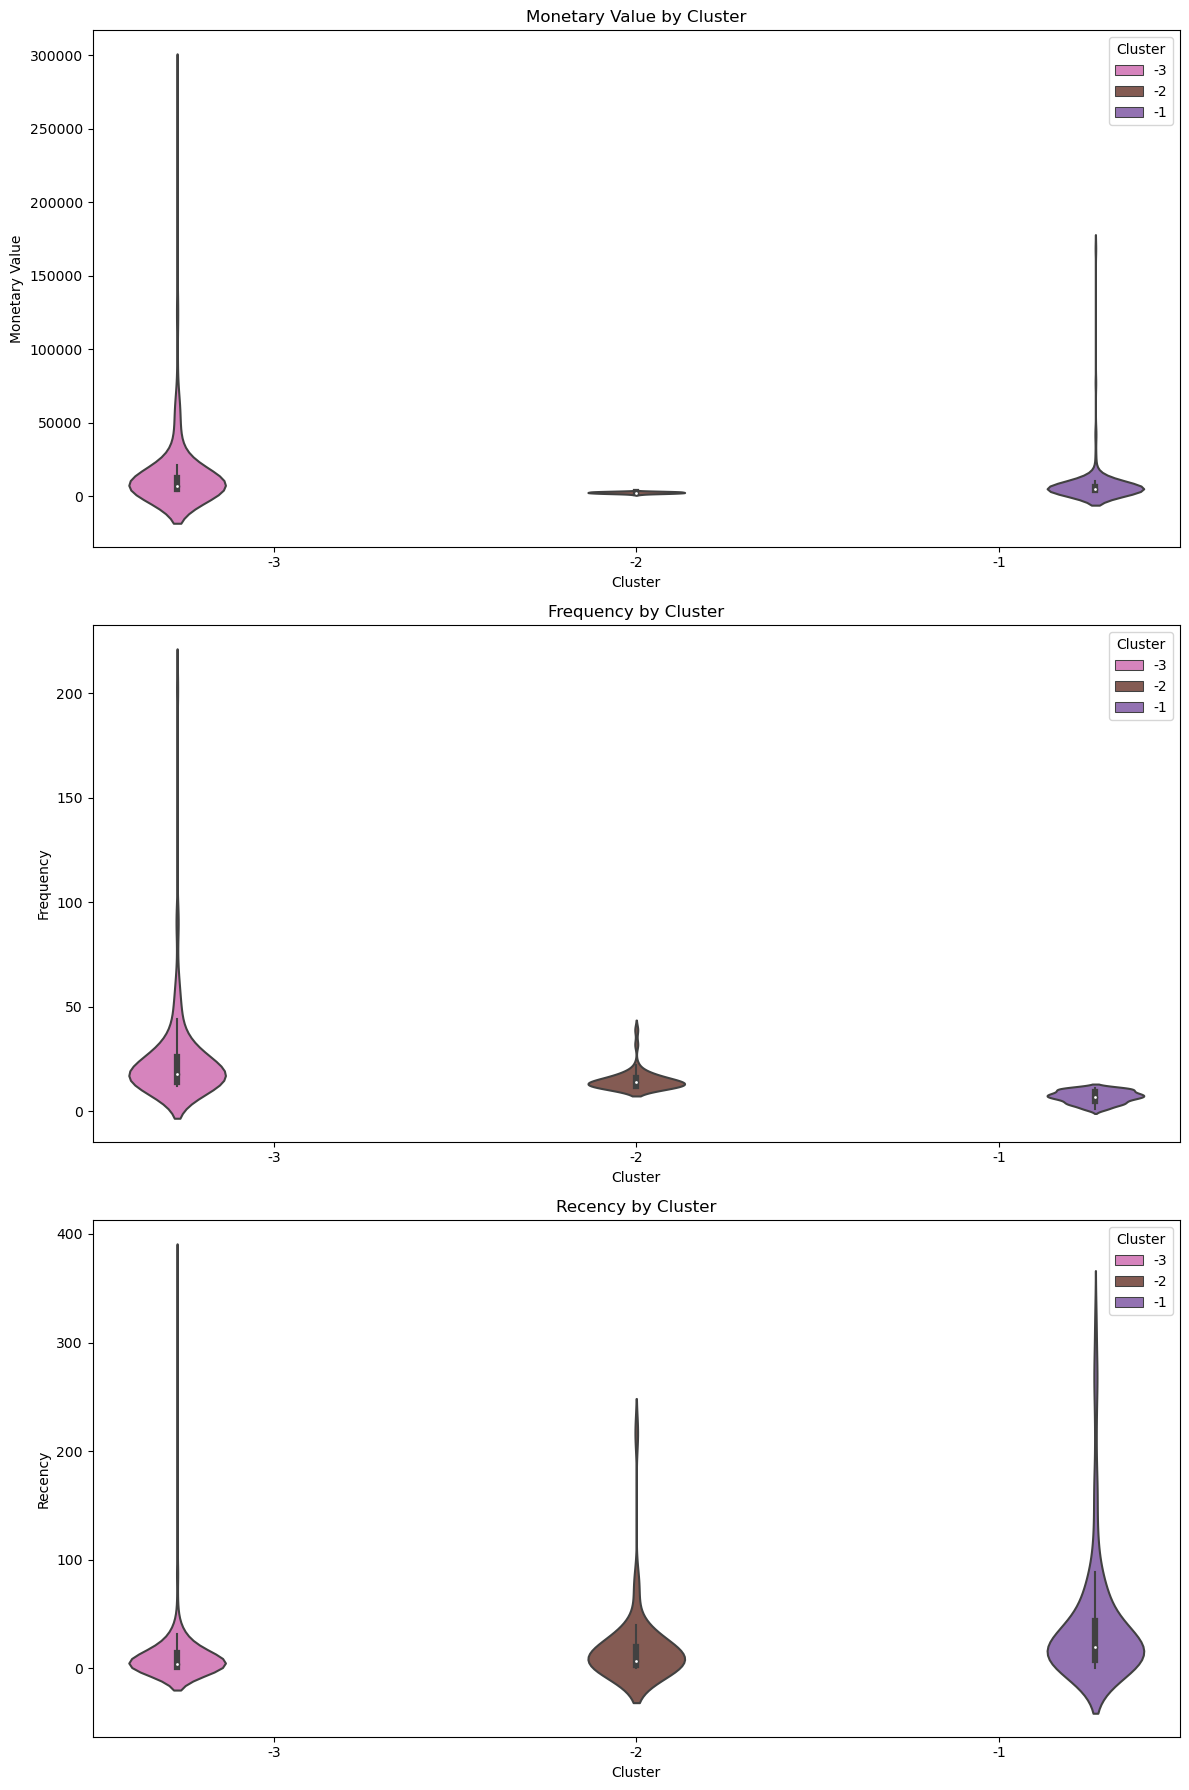

In [75]:
# Define the cluster colors for the outliers
cluster_colors = {-1: '#9467bd', -2: '#8c564b', -3: '#e377c2'}

plt.figure(figsize=(12, 18))

# Monetary Value by Cluster
plt.subplot(3, 1, 1)
sns.violinplot(x=outlier_clusters_df['Cluster'], y=outlier_clusters_df['MonetaryValue'], palette=cluster_colors, hue=outlier_clusters_df["Cluster"])
plt.title('Monetary Value by Cluster')
plt.ylabel('Monetary Value')

# Frequency by Cluster
plt.subplot(3, 1, 2)
sns.violinplot(x=outlier_clusters_df['Cluster'], y=outlier_clusters_df['Frequency'], palette=cluster_colors, hue=outlier_clusters_df["Cluster"])
plt.title('Frequency by Cluster')
plt.ylabel('Frequency')

# Recency by Cluster
plt.subplot(3, 1, 3)
sns.violinplot(x=outlier_clusters_df['Cluster'], y=outlier_clusters_df['Recency'], palette=cluster_colors, hue=outlier_clusters_df["Cluster"])
plt.title('Recency by Cluster')
plt.ylabel('Recency')

# Adjust layout
plt.tight_layout()
plt.show()


### Cluster -1: BigHitters (Indigo)
Characteristics: High spenders who don’t buy often but have made very recent purchases
* Strategy 1: Promote high-value products or bundles to match their spending habits and offer special “luxury tier” services.
* Strategy 2: Use targeted ads for high-end product launches or flash sales.
* Strategy 3: Encourage high-revenue behavior with exclusive invites to brand experiences or events.

### Cluster -2: DealHunters (Brown)
Characteristics: Frequent buyers who typically spend less per transaction, with most making recent purchases.
* Strategy 1: Offer frequent small promotions like free shipping or flash sales to keep them engaged without compromising margins.
* Strategy 2: Create budget-friendly bundles or subscription services that cater to their buying habits.
* Strategy 3: Keep them engaged with regular, time-limited email offers or rewards for consistent small purchases.

### Cluster -3: PowerPlayers (Purple)
Characteristics: The most valuable outliers, marked by very high spending and frequent, recent purchases.
* Strategy 1: Provide VIP services, high-level personalization, or direct access to account managers.
* Strategy 2: Invite them to ultra-exclusive product launches, behind-the-scenes events, or experiences.
* Strategy 3: Offer top-tier rewards or incentives for continued high-frequency and high-value purchasing.

In [76]:
cluster_labels = {
    0: "Loyalists",
    1: "Prospects",
    2: "VIPs",
    3: "Dormants",
    -1: "BigHitters",
    -2: "DealHunters",
    -3: "PowerPlayers"
}

In [77]:
full_clustering_df = pd.concat([non_outliers_df, outlier_clusters_df])

full_clustering_df

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency,Cluster
0,12348.00,1437.24,4,2011-09-25 13:13:00,74,0
1,12349.00,1457.55,1,2011-11-21 09:51:00,18,1
2,12350.00,294.40,1,2011-02-02 16:01:00,309,3
3,12352.00,1385.74,7,2011-11-03 14:37:00,35,2
4,12353.00,89.00,1,2011-05-19 17:47:00,203,3
...,...,...,...,...,...,...
4248,18172.00,7561.68,20,2011-11-25 11:12:00,14,-3
4268,18198.00,5425.56,17,2011-12-05 14:49:00,3,-3
4287,18223.00,6484.54,14,2011-12-05 09:11:00,4,-3
4289,18225.00,5504.96,12,2011-12-06 13:27:00,2,-3


In [78]:
full_clustering_df["ClusterLabel"] = full_clustering_df["Cluster"].map(cluster_labels)

full_clustering_df

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency,Cluster,ClusterLabel
0,12348.00,1437.24,4,2011-09-25 13:13:00,74,0,Loyalists
1,12349.00,1457.55,1,2011-11-21 09:51:00,18,1,Prospects
2,12350.00,294.40,1,2011-02-02 16:01:00,309,3,Dormants
3,12352.00,1385.74,7,2011-11-03 14:37:00,35,2,VIPs
4,12353.00,89.00,1,2011-05-19 17:47:00,203,3,Dormants
...,...,...,...,...,...,...,...
4248,18172.00,7561.68,20,2011-11-25 11:12:00,14,-3,PowerPlayers
4268,18198.00,5425.56,17,2011-12-05 14:49:00,3,-3,PowerPlayers
4287,18223.00,6484.54,14,2011-12-05 09:11:00,4,-3,PowerPlayers
4289,18225.00,5504.96,12,2011-12-06 13:27:00,2,-3,PowerPlayers


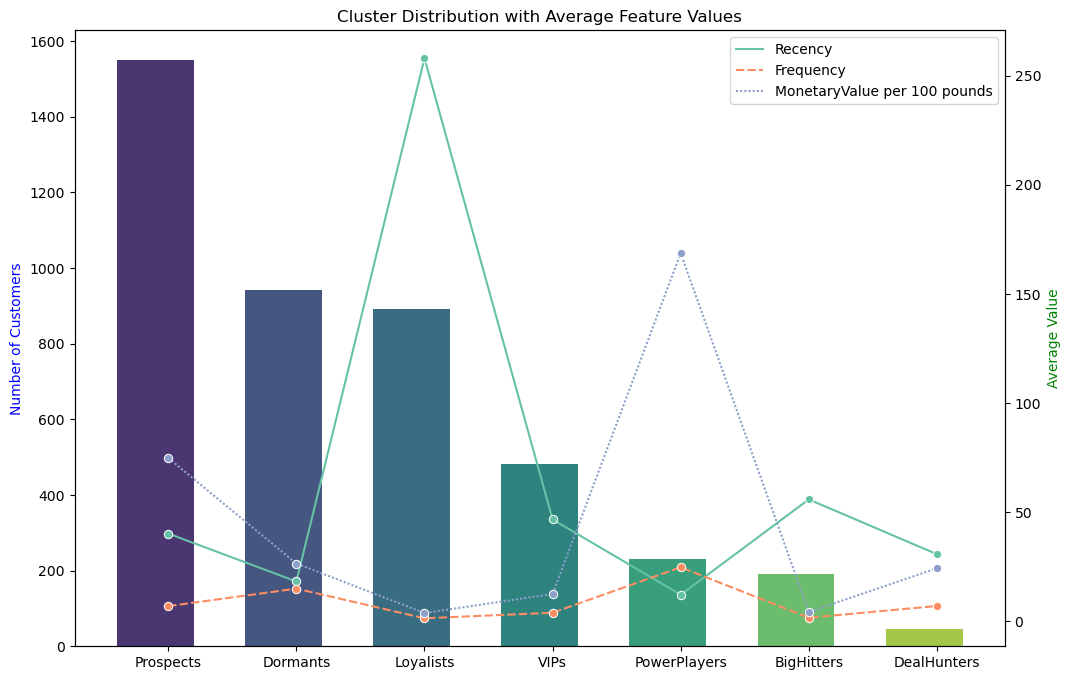

In [84]:
cluster_counts = full_clustering_df['ClusterLabel'].value_counts()
full_clustering_df["MonetaryValue per 100 pounds"] = full_clustering_df["MonetaryValue"] / 100.00
feature_means = full_clustering_df.groupby('ClusterLabel')[['Recency', 'Frequency', 'MonetaryValue per 100 pounds']].mean()

fig, ax1 = plt.subplots(figsize=(12, 8))

# Barplot without legend and without specifying width in sns.barplot()
sns.barplot(x=cluster_counts.index, y=cluster_counts.values, ax=ax1, palette='viridis')
ax1.set_ylabel('Number of Customers', color='b')
ax1.set_title('Cluster Distribution with Average Feature Values')

# Adjust the bar width using Matplotlib patches
for bar in ax1.patches:
    bar.set_width(0.6)

ax2 = ax1.twinx()

# Lineplot for feature means
sns.lineplot(data=feature_means, ax=ax2, palette='Set2', marker='o')
ax2.set_ylabel('Average Value', color='g')

plt.show()
